# **Exploratory Data Analysis, Data Preprocessing and Model Training on Lahore Air Quality Index 2023-2024**

Data Sources : [OpenAQ](https://api.openaq.org/)

----

## **Exploratory Data Analysis**


---

### **Importing Libraries**

In [42]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

### **Load the Dataset**

In [17]:
data = pd.read_csv(r"E:\Project and Advices\Project Air Quality Index project\data\raw\lahore_air_quality_data.csv")

### **Take a Look at first 10 rows of dataset**

In [18]:
data.head(10)

,locationId,location,parameter,value,date,unit,coordinates,country,city,isMobile,isAnalysis,entity,sensorType
0,8664,US Diplomatic Post: Lahore,pm25,281,"{'utc': '2024-08-05T00:00:00+00:00', 'local': ...",?g/m?,"{'latitude': 31.560078, 'longitude': 74.33589}",PK,NaN,False,NaN,Governmental Organization,reference grade
1,8664,US Diplomatic Post: Lahore,pm25,41,"{'utc': '2024-08-04T23:00:00+00:00', 'local': ...",?g/m?,"{'latitude': 31.560078, 'longitude': 74.33589}",PK,NaN,False,NaN,Governmental Organization,reference grade
2,8664,US Diplomatic Post: Lahore,pm25,26,"{'utc': '2024-08-04T22:00:00+00:00', 'local': ...",?g/m?,"{'latitude': 31.560078, 'longitude': 74.33589}",PK,NaN,False,NaN,Governmental Organization,reference grade
3,8664,US Diplomatic Post: Lahore,pm25,24,"{'utc': '2024-08-04T21:00:00+00:00', 'local': ...",?g/m?,"{'latitude': 31.560078, 'longitude': 74.33589}",PK,NaN,False,NaN,Governmental Organization,reference grade
4,8664,US Diplomatic Post: Lahore,pm25,29,"{'utc': '2024-08-04T20:00:00+00:00', 'local': ...",?g/m?,"{'latitude': 31.560078, 'longitude': 74.33589}",PK,NaN,False,NaN,Governmental Organization,reference grade
5,8664,US Diplomatic Post: Lahore,pm25,33,"{'utc': '2024-08-04T19:00:00+00:00', 'local': ...",?g/m?,"{'latitude': 31.560078, 'longitude': 74.33589}",PK,NaN,False,NaN,Governmental Organization,reference grade
6,8664,US Diplomatic Post: Lahore,pm25,42,"{'utc': '2024-08-04T18:00:00+00:00', 'local': ...",?g/m?,"{'latitude': 31.560078, 'longitude': 74.33589}",PK,NaN,False,NaN,Governmental Organization,reference grade
7,8664,US Diplomatic Post: Lahore,pm25,52,"{'utc': '2024-08-04T17:00:00+00:00', 'local': ...",?g/m?,"{'latitude': 31.560078, 'longitude': 74.33589}",PK,NaN,False,NaN,Governmental Organization,reference grade
8,8664,US Diplomatic Post: Lahore,pm25,64,"{'utc': '2024-08-04T16:00:00+00:00', 'local': ...",?g/m?,"{'latitude': 31.560078, 'longitude': 74.33589}",PK,NaN,False,NaN,Governmental Organization,reference grade
9,8664,US Diplomatic Post: Lahore,pm25,44,"{'utc': '2024-08-04T15:00:00+00:00', 'local': ...",?g/m?,"{'latitude': 31.560078, 'longitude': 74.33589}",PK,NaN,False,NaN,Governmental Organization,reference grade


### **Convert date column to datetime**

In [19]:
data['date'] = data['date'].apply(lambda x: eval(x)['local'])
data['date'] = pd.to_datetime(data['date'])

### **Let's Check Shape of the Dataset**

In [20]:
print(f"This dataset consist of {data.shape[0]} rows and {data.shape[1]} columns.")

This dataset consist of 9767 rows and 13 columns.


### **Information About dataset**

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9767 entries, 0 to 9766
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype                    
---  ------       --------------  -----                    
 0   locationId   9767 non-null   int64                    
 1   location     9767 non-null   object                   
 2   parameter    9767 non-null   object                   
 3   value        9767 non-null   int64                    
 4   date         9767 non-null   datetime64[ns, UTC+05:00]
 5   unit         9767 non-null   object                   
 6   coordinates  9767 non-null   object                   
 7   country      9767 non-null   object                   
 8   city         0 non-null      float64                  
 9   isMobile     9767 non-null   bool                     
 10  isAnalysis   0 non-null      float64                  
 11  entity       9767 non-null   object                   
 12  sensorType   9767 non-null   object             

### **Let's Check Columns with Missing Values**

In [22]:
missing_values = data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index.tolist()

print(f"The columns with missing values are {columns_with_missing_values[0]} and {columns_with_missing_values[1]}.")

The columns with missing values are city and isAnalysis.


In [23]:
data.describe()

,locationId,value,city,isAnalysis
count,9767.0,9767.000000,0.0,0.0
mean,8664.0,-76.456742,NaN,NaN
std,0.0,445.271374,NaN,NaN
min,8664.0,-999.000000,NaN,NaN
25%,8664.0,27.000000,NaN,NaN
50%,8664.0,58.000000,NaN,NaN
75%,8664.0,145.000000,NaN,NaN
max,8664.0,884.000000,NaN,NaN


### **Check for missing values**

In [24]:
print(data.isnull().sum())

locationId        0
location          0
parameter         0
value             0
date              0
unit              0
coordinates       0
country           0
city           9767
isMobile          0
isAnalysis     9767
entity            0
sensorType        0
dtype: int64


### **Visualizations**

#### **Distribution of PM2.5 values**

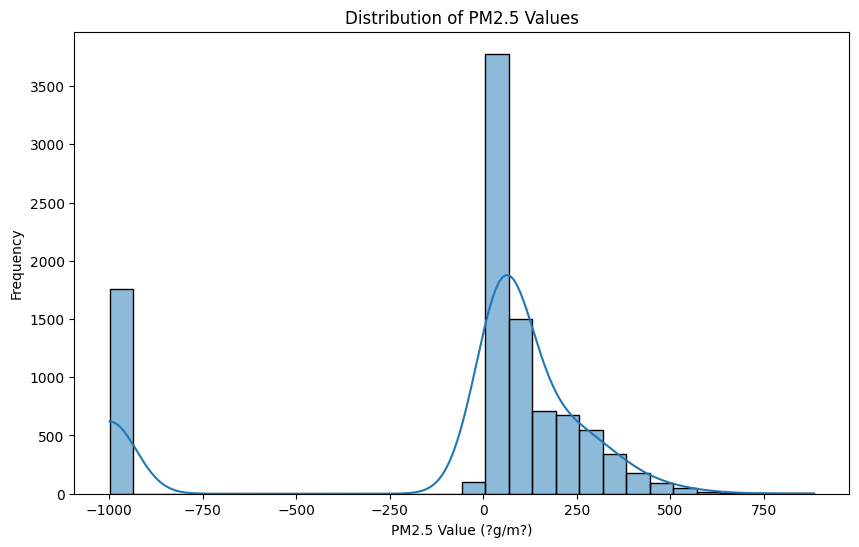

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data['value'], bins=30, kde=True)
plt.title('Distribution of PM2.5 Values')
plt.xlabel('PM2.5 Value (?g/m?)')
plt.ylabel('Frequency')
plt.show()

### **Time series plot of PM2.5 values**

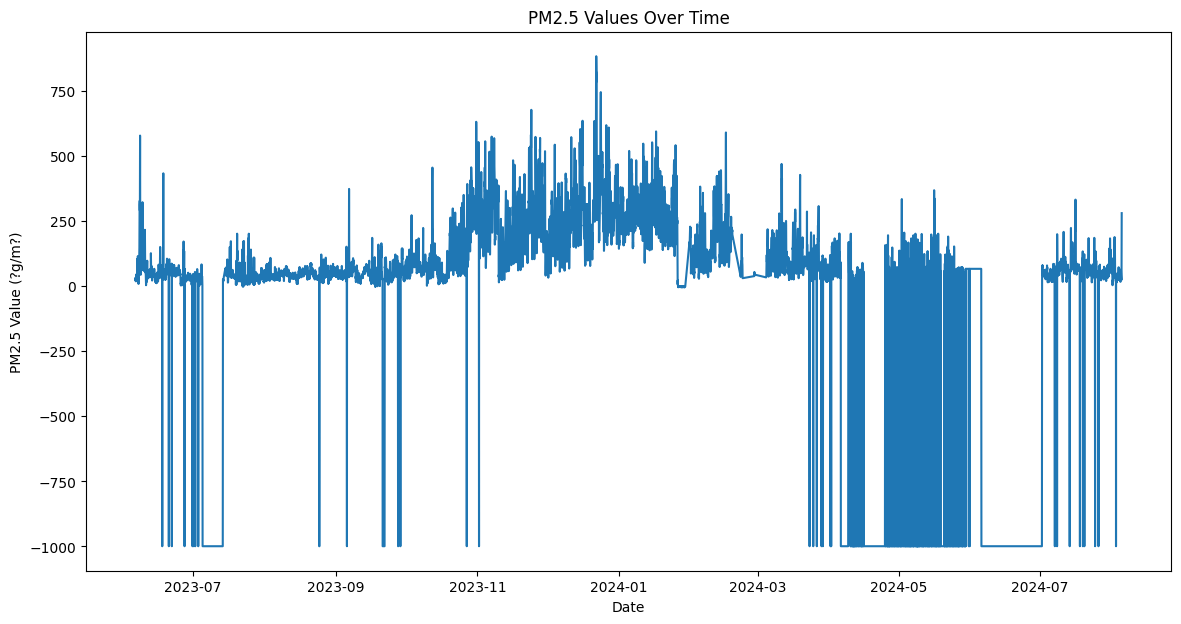

In [26]:
plt.figure(figsize=(14, 7))
plt.plot(data['date'], data['value'])
plt.title('PM2.5 Values Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 Value (?g/m?)')
plt.show()

#### **Box Plot of Categorical Features**

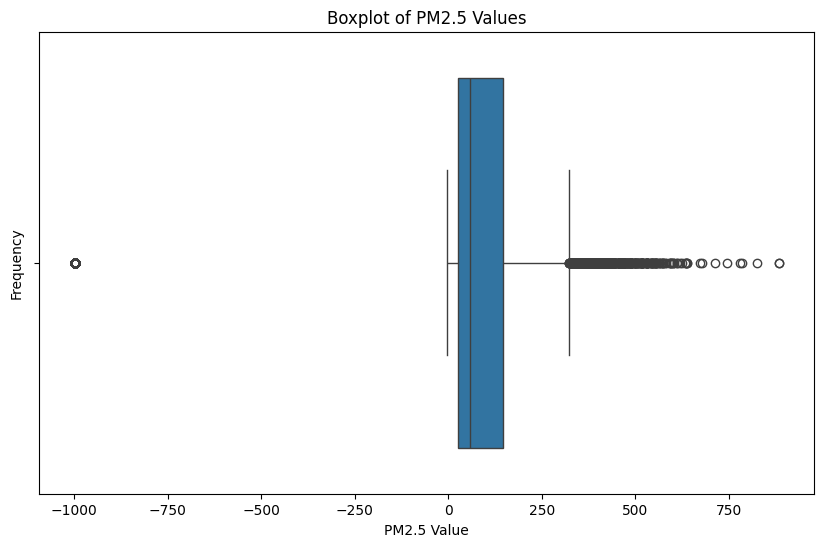

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='value', data=data)
plt.title('Boxplot of PM2.5 Values')
plt.xlabel('PM2.5 Value')
plt.ylabel('Frequency')
plt.show()

### **Initial Observations**

- This Pandas DataFrame with 9767 entries and 13 columns. 
- The columns include locationId, location, parameter, value, date, unit, coordinates, country, city, isMobile, isAnalysis, entity, and sensorType. 
- The DataFrame contains a mix of data types, including integers, floats, strings, and booleans.
- The columns with missing values are city and isAnalysis.

-----

## **Data Preprocessing**

-----

### **Feature engineering**

In [28]:
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour
data['weekday'] = data['date'].dt.weekday

### **Drop columns that won't be used**

In [29]:
data = data.drop(columns=['locationId', 'location', 'parameter', 'unit', 'coordinates', 'country', 'city', 'isMobile', 'isAnalysis', 'entity', 'sensorType'])

### **Define features and target variable**

In [30]:
X = data[['month', 'day', 'hour', 'weekday']]
y = data['value']

### **Train-test split**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Save preprocessed data**

In [32]:
processed_data_path = "E:/Project and Advices/Project Air Quality Index project/data/processed/"
X_train.to_csv(processed_data_path + 'X_train.csv', index=False)
X_test.to_csv(processed_data_path + 'X_test.csv', index=False)
y_train.to_csv(processed_data_path + 'y_train.csv', index=False)
y_test.to_csv(processed_data_path + 'y_test.csv', index=False)

-----

## **Model Training**

-----

### **Define a function to evaluate models**

In [34]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

### **Define models**

In [36]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

### **Evaluate each model**

In [37]:
results = {}
for name, model in models.items():
    mse, mae, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

### **Display results**

In [39]:
results_df = pd.DataFrame(results).T
results_df

,MSE,MAE,R2
Linear Regression,180803.020723,311.689715,0.037477
Decision Tree,64498.705732,78.227738,0.656635
Random Forest,43069.793416,77.772697,0.770714
Gradient Boosting,87557.958976,200.872771,0.533876
XGBoost,41299.768869,101.028786,0.780137
Support Vector Regressor,198513.045573,240.128128,-0.056804


### **Select the best model**

In [41]:
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]
print(f"The best model is {best_model_name} with R2 score of {results_df.loc[best_model_name, 'R2']}.")

The best model is XGBoost with R2 score of 0.7801365256309509.


### **Save the best model**

In [43]:
model_save_path = "E:/Project and Advices/Project Air Quality Index project/models/"
joblib.dump(best_model, model_save_path + 'best_model.pkl')

['E:/Project and Advices/Project Air Quality Index project/models/best_model.pkl']